In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing the data
data=pd.read_excel(r"D:\House-Price-Prediction\house_price.xlsx")

In [3]:
from pycaret.utils import version
version()

1.0.0


In [4]:
dataset=pd.DataFrame(data)

In [5]:
# Number of columns in data set
dataset.shape

(1000, 8)

In [6]:
# Reading first five records in data set
dataset.head()

,Unnamed: 0,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,37,Bommanahalli,3,1,3000,1,3,28000
1,43,Bommanahalli,3,1,1650,10,0,18000
2,12,Whitefield,2,0,1000,5,3,16400
3,8,Whitefield,3,0,1600,1,9,27000
4,9,Whitefield,2,1,1200,5,1,20000


In [7]:
# Displaying the column names
dataset.columns

Index(['Unnamed: 0', 'Location', 'BHK', 'Furnishing', 'Sq.ft', 'Old(years)',
       'Floor', 'Price'],
      dtype='object')

In [8]:
# Removing the column
data=data.drop('Unnamed: 0',axis=1)
data.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [9]:
# Renaming the columns
data=data.rename(columns={'Sq.ft':'Square_feet','Old(years)':'Old_years'})
data.head()

,Location,BHK,Furnishing,Square_feet,Old_years,Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [10]:
# Finding the number of missing values
data.isnull().sum()

Location       0
BHK            0
Furnishing     0
Square_feet    0
Old_years      0
Floor          0
Price          0
dtype: int64

In [11]:
# Displaying the type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Location     1000 non-null   object
 1   BHK          1000 non-null   int64 
 2   Furnishing   1000 non-null   int64 
 3   Square_feet  1000 non-null   int64 
 4   Old_years    1000 non-null   int64 
 5   Floor        1000 non-null   int64 
 6   Price        1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [12]:
# DIsplaying the summary of data
data.describe()

,BHK,Furnishing,Square_feet,Old_years,Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


In [13]:
# Importing module and initializing setup
from pycaret.regression import *
reg1 = setup(data = data, target = 'Price')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4365
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1000, 7)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
# comparing all models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.857100,171.428600,4.140400,1.000000,0.000200,0.000000
1,Decision Tree,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,CatBoost Regressor,3.884700,27.545100,5.177700,1.000000,0.000300,0.000200
3,Random Forest,0.522300,25.140300,3.165400,1.000000,0.000100,0.000000
4,Extra Trees Regressor,3.214300,6167.571400,26.892600,0.999900,0.001100,0.000100
5,Light Gradient Boosting Machine,57.655900,10099.863100,97.212300,0.999800,0.003800,0.002400
6,Gradient Boosting Regressor,316.335000,181203.761100,423.342400,0.996900,0.020300,0.014900
7,Extreme Gradient Boosting,354.684700,221806.413100,465.380700,0.996200,0.023000,0.016800
8,AdaBoost Regressor,1374.139300,2796388.993400,1667.614300,0.953900,0.077800,0.063600
9,Linear Regression,1993.458200,6725282.221400,2577.102400,0.889900,0.119300,0.097200


In [20]:
# creating a model
#ada = create_model('ada')
#ada = create_model('ada', fold = 5, round = 2)
rf= create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0000,0.0000,0.0000,1.0,0.0000,0.0000
1,1.4286,117.1429,10.8233,1.0,0.0003,0.0000
2,0.0000,0.0000,0.0000,1.0,0.0000,0.0000
3,1.0000,18.5714,4.3095,1.0,0.0002,0.0000
4,0.2857,5.7143,2.3905,1.0,0.0001,0.0000
5,0.0000,0.0000,0.0000,1.0,0.0000,0.0000
6,1.9286,86.7857,9.3159,1.0,0.0005,0.0001
7,0.0000,0.0000,0.0000,1.0,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0,0.0000,0.0000
9,0.5797,23.1884,4.8154,1.0,0.0003,0.0000


In [21]:
# parameters Inside the model
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=4365, verbose=0, warm_start=False)


In [22]:
# Bagging enseemble method
#tuned_bagged_dt = tune_model('dt', ensemble = True, method = 'Bagging', n_iter = 100)

In [23]:
# Boosting ensemble method
#tuned_boosted_dt = tune_model('dt', ensemble = True, method = 'Boosting', n_iter = 100)

In [25]:
# tuning the model to optimizing the parameters
tuned_rf = tune_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
# parameters after tuning
print(rf)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=6235,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


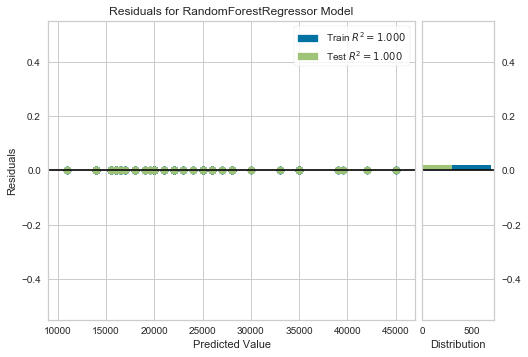

In [26]:
plot_model(tuned_rf)

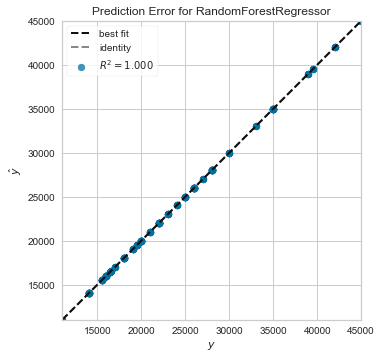

In [27]:
plot_model(tuned_rf, plot = 'error')

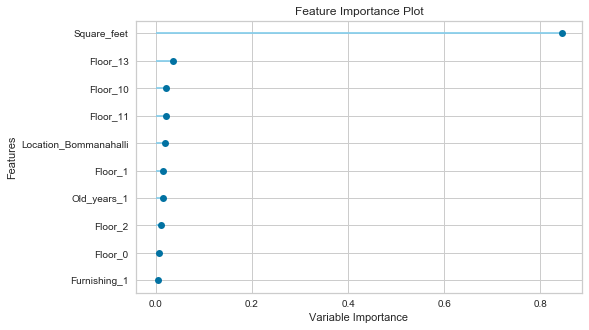

In [28]:
plot_model(tuned_rf, plot='feature')

In [29]:
# Evaluation metrics for regression
evaluate_model(tuned_rf);

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
predict_model(tuned_rf);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
# finalizing the model for deployment
final_model = finalize_model(tuned_rf)

In [34]:
# saving the final model
save_model(final_model,'Final Model for Hosue price')

Transformation Pipeline and Model Succesfully Saved


In [35]:
# loading the model for prediction on new data
saved_final_model = load_model('Final Model for Hosue price')

Transformation Pipeline and Model Sucessfully Loaded


In [36]:
# Extracting 100 records for prediction
data_unseen=data.iloc[0:100,:]
#data_unseen=data_unseen.drop('Price',axis=1)

In [38]:
# Predicting the House price on new data
new_prediction = predict_model(saved_final_model, data=data_unseen)

In [40]:
# comparing the house prices (Actual price: Price, Predicted price: Label)
# 100% accuracy
new_prediction.head(100)

,Location,BHK,Furnishing,Square_feet,Old_years,Floor,Price,Label
0,Bommanahalli,3,1,3000,1,3,28000,28000.0
1,Bommanahalli,3,1,1650,10,0,18000,18000.0
2,Whitefield,2,0,1000,5,3,16400,16400.0
3,Whitefield,3,0,1600,1,9,27000,27000.0
4,Whitefield,2,1,1200,5,1,20000,20000.0
...,...,...,...,...,...,...,...,...
95,Bommanahalli,2,0,1135,10,2,16000,16000.0
96,Whitefield,3,0,2117,1,0,33000,33000.0
97,Bommanahalli,2,0,950,5,1,14000,14000.0
98,Bommanahalli,2,1,1300,5,3,20000,20000.0
